In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

# Strong Features

Data Preparation

In [2]:
admission_csv = 'C:/Users/zheng/Desktop/Data Science/Presentations/Mod 4//admission.csv'

admission = pd.read_csv(admission_csv)

In [3]:
X = admission[['GRE Score', 'CGPA']].values.reshape(-1,2)
Y = admission['Chance of Admit']

Prepare model data point for visualization

In [15]:
x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(0, 340, 10)   # range of GRE Score values
y_pred = np.linspace(0, 10, 10)  # range of CGPA values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

Train

In [16]:
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

Evaluate

In [17]:
r2 = model.score(X, Y)

Plot

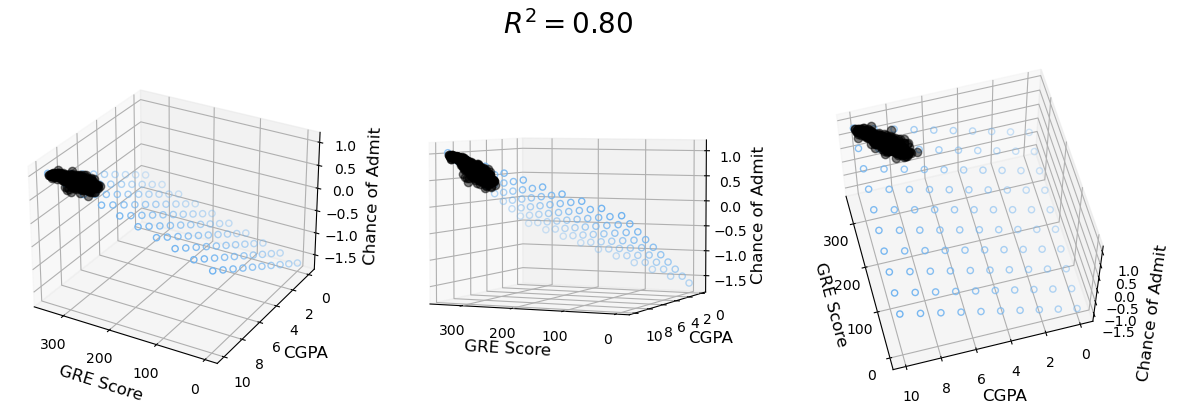

In [18]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('GRE Score', fontsize=12)
    ax.set_ylabel('CGPA', fontsize=12)
    ax.set_zlabel('Chance of Admit', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
    
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)
    
fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

The gif was generated by creating 360 different plots viewed from different angles with the following code snippet, and combined into a single gif from imgflip.

In [21]:
for ii in np.arange(0, 360, 1):
    ax3.view_init(elev=32, azim=ii)
    fig.savefig('gif_sf_image%d.png' % ii)

# Weak Features

In [9]:
X1 = admission[['Research', 'LOR']].values.reshape(-1,2)
Y = admission['Chance of Admit']

In [11]:
x = X1[:, 0]
y = X1[:, 1]
z = Y

x_pred = np.linspace(0, 1, 10)   # range of Research values
y_pred = np.linspace(0, 5, 10)  # range of LOR values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [12]:
ols = linear_model.LinearRegression()
model = ols.fit(X1, Y)
predicted = model.predict(model_viz)

In [13]:
r2 = model.score(X1, Y)

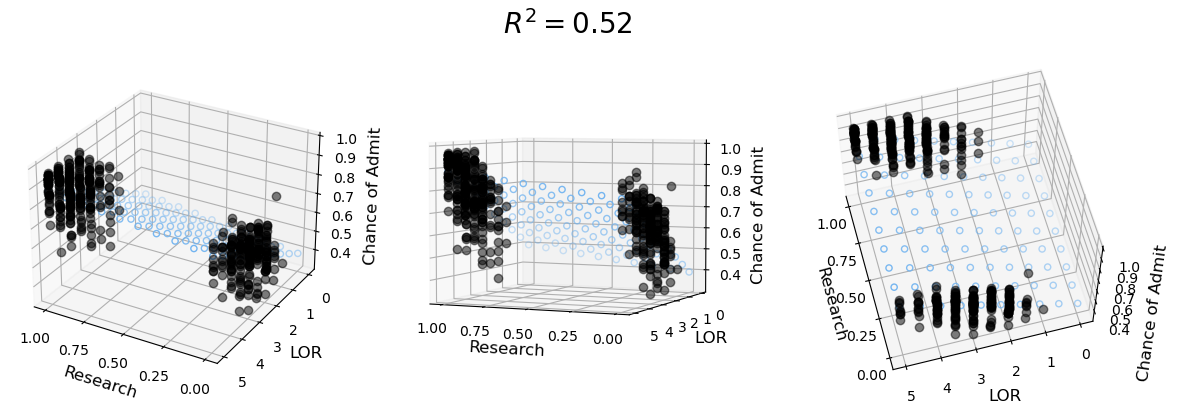

In [14]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Research', fontsize=12)
    ax.set_ylabel('LOR', fontsize=12)
    ax.set_zlabel('Chance of Admit', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
    
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)
    
fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [20]:
for ii in np.arange(0, 360, 1):
    ax.view_init(elev=32, azim=ii)
    fig.savefig('gif_wf_image%d.png' % ii)